# Exercice 1


In [9]:
%pip install seaborn

/usr/lib64/python3.13/pty.py:95: DeprecationWarning: This process (pid=185374) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from apyori import apriori as ap

In [19]:
df = pd.DataFrame({
    "Lait": [1,1,0,1,0,1,0],
    "Pain": [1,0,1,1,1,1,0],
    "Beurre": [1,0,1,0,1,1,0],
    "Jus d' orange":[0,1,0,0,0,0,1],
    "Céréales":[0,1,0,1,1,1,1],
})
df

,Lait,Pain,Beurre,Jus d' orange,Céréales
0,1,1,1,0,0
1,1,0,0,1,1
2,0,1,1,0,0
3,1,1,0,0,1
4,0,1,1,0,1
5,1,1,1,0,1
6,0,0,0,1,1


In [20]:
# Utiliser apriori pour trouver les itemsets fréquents
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

print("Itemsets fréquents :")

Itemsets fréquents :


/home/aziz/.local/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
print(frequent_itemsets)

     support                         itemsets
0   0.571429                           (Lait)
1   0.714286                           (Pain)
2   0.571429                         (Beurre)
3   0.285714                  (Jus d' orange)
4   0.714286                       (Céréales)
5   0.428571                     (Pain, Lait)
6   0.285714                   (Beurre, Lait)
7   0.142857            (Jus d' orange, Lait)
8   0.428571                 (Céréales, Lait)
9   0.571429                   (Beurre, Pain)
10  0.428571                 (Céréales, Pain)
11  0.285714               (Beurre, Céréales)
12  0.285714        (Jus d' orange, Céréales)
13  0.285714             (Beurre, Pain, Lait)
14  0.285714           (Céréales, Pain, Lait)
15  0.142857         (Beurre, Céréales, Lait)
16  0.142857  (Jus d' orange, Céréales, Lait)
17  0.285714         (Beurre, Céréales, Pain)
18  0.142857   (Beurre, Céréales, Pain, Lait)


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("\nRègles d’association :")


Règles d’association :


In [23]:
print(rules[["antecedents", "consequents", "support", "confidence", "lift"]])

                 antecedents               consequents   support  confidence  \
0                     (Pain)                    (Lait)  0.428571    0.600000   
1                     (Lait)                    (Pain)  0.428571    0.750000   
2                 (Céréales)                    (Lait)  0.428571    0.600000   
3                     (Lait)                (Céréales)  0.428571    0.750000   
4                   (Beurre)                    (Pain)  0.571429    1.000000   
5                     (Pain)                  (Beurre)  0.571429    0.800000   
6            (Jus d' orange)                (Céréales)  0.285714    1.000000   
7                 (Céréales)           (Jus d' orange)  0.285714    0.400000   
8             (Beurre, Lait)                    (Pain)  0.285714    1.000000   
9               (Pain, Lait)                  (Beurre)  0.285714    0.666667   
10                  (Beurre)              (Pain, Lait)  0.285714    0.500000   
11                    (Pain)            

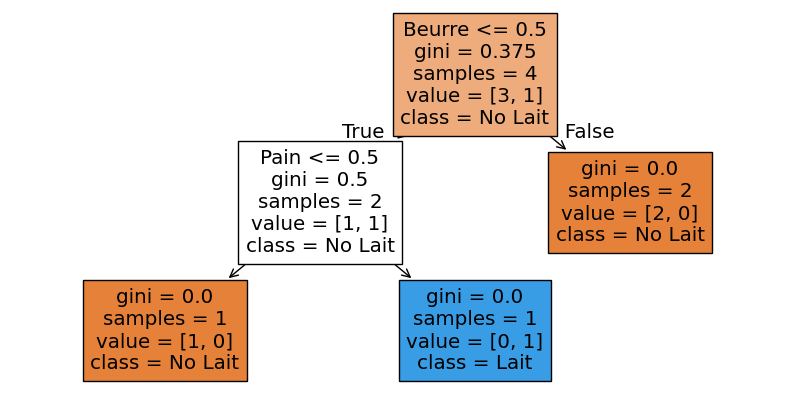

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Prepare the data
X = df.drop(columns=["Lait"])  # Features
y = df["Lait"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 5))
tree.plot_tree(clf, feature_names=X.columns, class_names=["No Lait", "Lait"], filled=True)
plt.show()